# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# BERT *Classifier for Wikipedia Toxic Comments*

![Kaggle - Toxic Comment Classification Challenge](https://drive.google.com/uc?id=1AJGWaL4FYfc-Jm_s8EF4NO3EwrpRvG9o)

---

### Classificação *Multi-label* (Multirótulo)

<center>
  <img width="400" src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_twitter-min.png"/>
</center>

---

### *Transfer-Learning*

<center>
  <img width="700" src="https://lena-voita.github.io/resources/lectures/transfer/intro/idea-min.png"/>
</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages

In [ ]:
!pip install scikit-multilearn
!pip install transformers
!pip install tensorflow-addons
!pip install keras-tqdm

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '/content/drive/MyDrive/Ciência de Dados/Projeto Final'
DATASETS_PATH = BASE_PATH + "/Resources/Datasets"

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.117.176.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.117.176.162:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [ ]:
df = pd.read_csv(DATASETS_PATH + '/Wikipedia Toxic Comments/new_data.csv')

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels_count,if_safe,comment_text_tokens,clean_comment_text,comment_text_tokens_count,clean_comment_text_words2ignore
0,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1,6,False,"['wouldnt', 'time', 'bitch', 'fuck', 'ill', 'f...",wouldnt be the first time bitch fuck you ill f...,28,wouldnt time bitch fuck ill find live sodomize...
1,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1,6,False,"['shut', 'fat', 'poop', 'kick', 'ass']",shut up you fat poop or i will kick your ass,11,shut fat poop kick ass
2,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,6,False,"['youre', 'stupid', 'cunt', 'fuck', 'dumb', 'a...",youre a stupid cunt fuck you dumb arse your mu...,59,youre stupid cunt fuck dumb arse mum hairy cun...
3,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,6,False,"['going', 'murder', 'zimzalabim', 'st47', 'evi...",i am going to murder zimzalabim st47 for being...,12,going murder zimzalabim st47 evil homosexual jews
4,3a704e2efa9fa300,FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...,1,1,1,1,1,1,6,False,"['fuck', 'fucking', 'nigger', 'bag', 'shit', '...",fuck you you fucking nigger bag of shit i hope...,42,fuck fucking nigger bag shit hope die horrible...


In [ ]:
labels = ['toxic', 'severe_toxic',	'obscene', 'threat', 'insult', 'identity_hate']

# Treinamento do BERT *Classifier*

<center>
  <img width="700" src="https://lena-voita.github.io/resources/lectures/transfer/bert/intro-min.png"/>
</center>

## Representação Textual

<center>
  <img width="700" src="https://lena-voita.github.io/resources/lectures/transfer/bert/bert_input.gif"/>
</center>

In [ ]:
padded_tokens_ids, padded_masked_ids = text.padding_sequences(df['clean_comment_text'].to_numpy(), 
                                                                  max_length=text.MAX_LENGTH)


Text to sequences for BERT Classifier:   0%|          | 0/16188 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (899 > 512). Running this sequence through the model will result in indexing errors


Padding the sequences...


In [ ]:
padded_tokens_ids.shape, padded_masked_ids.shape

((16188, 60), (16188, 60))

## Divisão Estratificada

In [ ]:
dict_padded_tokens_ids = {k: v for k, v in enumerate(padded_tokens_ids)}
dict_padded_masked_ids = {k: v for k, v in enumerate(padded_masked_ids)}

y = df[labels].to_numpy()

X_train_ids, y_train, X_test_ids, y_test, X_dev_ids, y_dev = text.data_split(padded_tokens_ids, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train_ids.shape, y_train.shape), (X_test_ids.shape, y_test.shape), (X_dev_ids.shape, y_dev.shape), y.shape

(((11655, 60), (11655, 6)),
 ((3238, 60), (3238, 6)),
 ((1295, 60), (1295, 6)),
 (16188, 6))

In [ ]:
X_train_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_train_ids)])
X_test_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_test_ids)])
X_dev_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_dev_ids)])

X_train_masks.shape, X_test_masks.shape, X_dev_masks.shape

((11655, 60), (3238, 60), (1295, 60))

In [ ]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data': Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)"
data,4027,1586,3510,571,3348,1131
train,2640,1142,2515,411,2398,1074
test,991,317,716,114,684,47
dev,396,127,279,46,266,10


In [ ]:
test_data = pd.DataFrame(columns=['tokens_ids', 'masked_ids', 'y'])

for ids, masks, y in zip(X_test_ids, X_test_masks, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'masked_ids': masks,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/Wikipedia Toxic Comments/padded_test_data.json', orient='records')

## Treino do Modelo

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/Resources/Models/best_bert_linear_classifier2_toxic_comments.h5'

model_meta = model.run_text_classifier(model.bert_linear_classifier2,
                                       [X_train_ids, X_train_masks], y_train,
                                       [X_dev_ids, X_dev_masks], y_dev,
                                       batch_size=32,
                                       max_epochs=50,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=252,
                                       labels_size=len(labels), 
                                       model_path=model_path)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica TFSequenceClassifier 109483778   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 252)          756         tf_bert_for_sequence_classifi

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 6) dtype=int64>]


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 6) dtype=int64>]


  6/365 [..............................] - ETA: 25s - loss: 0.6976 - auc: 0.5018WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0094s vs `on_train_batch_end` time: 9.1150s). Check your callbacks.


365/365 [==============================] - ETA: 0s - loss: 0.4150 - auc: 0.7525

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 6) dtype=int64>]


365/365 [==============================] - 178s 251ms/step - loss: 0.4150 - auc: 0.7525 - val_loss: 0.3043 - val_auc: 0.8802

Epoch 00001: val_auc improved from -inf to 0.88025, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_toxic_comments.h5
Epoch 2/50
365/365 [==============================] - 27s 74ms/step - loss: 0.1715 - auc: 0.9450 - val_loss: 0.2788 - val_auc: 0.8971

Epoch 00002: val_auc improved from 0.88025 to 0.89706, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_toxic_comments.h5
Epoch 3/50
365/365 [==============================] - 27s 75ms/step - loss: 0.1343 - auc: 0.9623 - val_loss: 0.2883 - val_auc: 0.8921

Epoch 00003: val_auc did not improve from 0.89706
Epoch 4/50
365/365 [==============================] - 26s 72ms/step - loss: 0.1096 - auc: 0.9713 - val_loss: 0.3519 - val_auc: 0.8942

Epoch 00004: val_auc did not improve from 

In [ ]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('00:10:55', '18/08/2021 12:39', '18/08/2021 12:50')

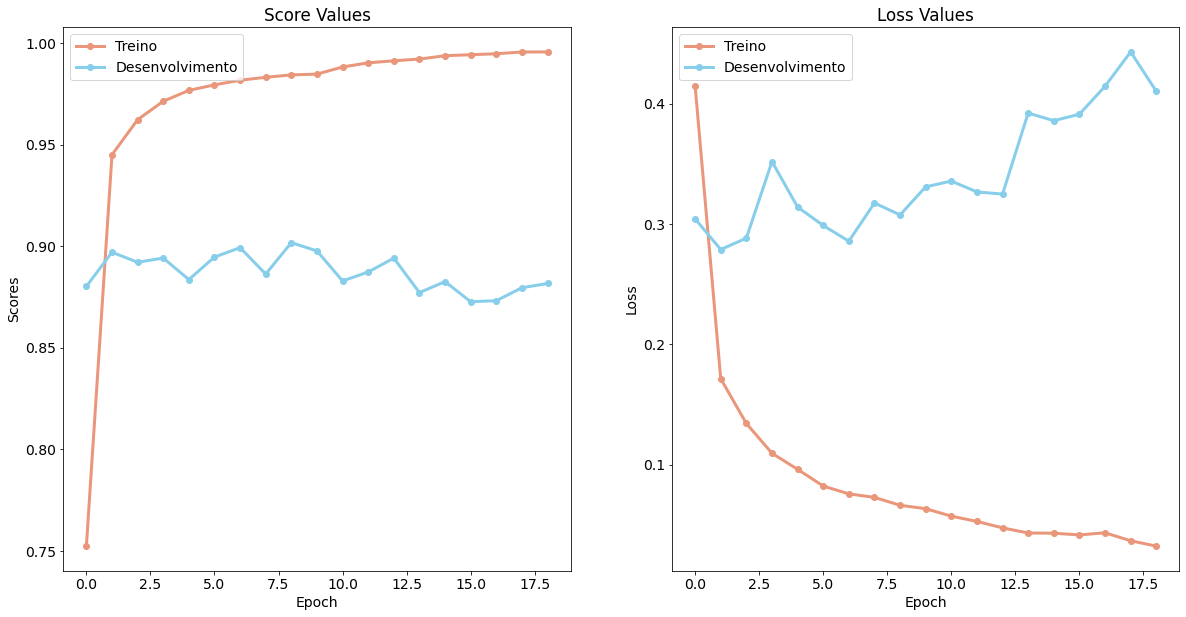

In [ ]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [ ]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict([X_test_ids, X_test_masks]))

print(classification_report(y_test, y_pred, target_names=labels))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>]


               precision    recall  f1-score   support

        toxic       0.80      0.77      0.79       991
 severe_toxic       0.42      0.18      0.25       317
      obscene       0.66      0.83      0.74       716
       threat       0.72      0.80      0.76       114
       insult       0.60      0.66      0.63       684
identity_hate       0.25      0.40      0.31        47

    micro avg       0.67      0.69      0.68      2869
    macro avg       0.58      0.61      0.58      2869
 weighted avg       0.66      0.69      0.67      2869
  samples avg       0.21      0.21      0.20      2869

